In [1]:
import cv2
import numpy
import matplotlib.pyplot as plt
import numpy as np

In [2]:
yolo = cv2.dnn.readNet('../pretrained_model/yolov4.weights', '../pretrained_model/yolov4.cfg')

In [3]:
classes = []
with open('../data/coco.names', 'r') as f:
    classes = f.read().splitlines()
print(len(classes))

80


(655, 1140, 3)


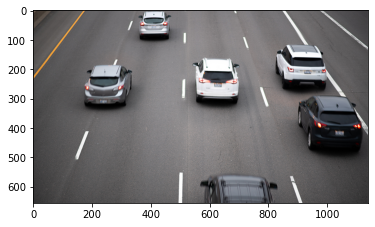

In [4]:
image = plt.imread('../images/detection.jpg')
print(image.shape)
plt.imshow(image)

In [5]:
p_image = cv2.dnn.blobFromImage(image,1/255, (608,608), (0,0,0), False, False )
p_image.shape

(1, 3, 608, 608)

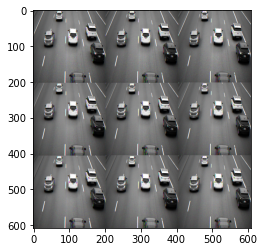

In [6]:
i = p_image[0].reshape(608,608,3)
plt.imshow(i)

In [7]:
yolo.setInput(p_image)

In [8]:
output_layer_names = yolo.getUnconnectedOutLayersNames()


In [9]:
output = yolo.forward(output_layer_names)

In [10]:
output[0].shape

(17328, 85)

In [11]:
hight,width,_ = image.shape

In [12]:
boxes = []
confidences = []
class_ids = []

for i in output:
    for detection in i:
        score = detection[5:]
        class_id = np.argmax(score)
        confidence = score[class_id]
        
        if confidence > 0.7:
            centre_x = int(detection[0] * width)
            centre_y = int(detection[1] * hight)
            w = int(detection[2] * width)
            h = int(detection[3] * hight)
            
            x = int(centre_x - w/2)
            y = int(centre_y - h/2)
            
            boxes.append([x,y,w,h])
            confidences.append((float(confidence)))
            class_ids.append(class_id)

In [13]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.7, 0.4)

In [14]:
font = cv2.FONT_HERSHEY_PLAIN
color = np.random.uniform(0,255,size=(len(boxes),3))

In [15]:
for i in indexes.flatten():
    x,y,w,h = boxes[i]
    label = str(classes[class_ids[i]])
    prob = str(round(confidences[i], 2)) 
    c = color[i]
    cv2.rectangle(image, (x,y), (x+w, y+h), c, 5)
    cv2.putText(image, label + ' ' + prob, (x,y-5), font,2,(0, 0, 0),3)

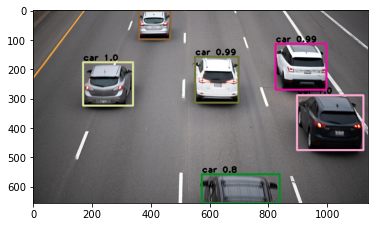

In [16]:
plt.imshow(image)

In [17]:
cv2.imwrite('../images/output/detection.jpg', image)



True